In [1]:
%matplotlib inline

In [2]:
import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image, ImageDraw
from random import randint
import json

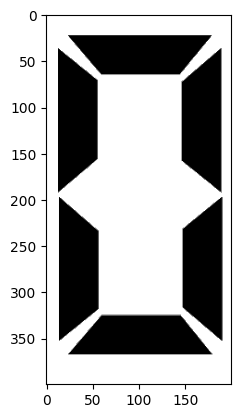

In [3]:

max_digits = 5
# source_digits = {"0": Image.open("training/MASTER/digit_0.png"),
#                  "1": Image.open("training/MASTER/digit_1.png"),
#                  "2": Image.open("training/MASTER/digit_2.png"),
#                  "3": Image.open("training/MASTER/digit_3.png"),
#                  "4": Image.open("training/MASTER/digit_4.png"),
#                  "5": Image.open("training/MASTER/digit_5.png"),
#                  "6": Image.open("training/MASTER/digit_6.png"),
#                  "7": Image.open("training/MASTER/digit_7.png"),
#                  "8": Image.open("training/MASTER/digit_8.png"),
#                  "9": Image.open("training/MASTER/digit_9.png")}

source_digits = {"0": Image.open("training/MASTER/hq_0.png"),
                 "1": Image.open("training/MASTER/hq_1.png"),
                 "2": Image.open("training/MASTER/hq_2.png"),
                 "3": Image.open("training/MASTER/hq_3.png"),
                 "4": Image.open("training/MASTER/hq_4.png"),
                 "5": Image.open("training/MASTER/hq_5.png"),
                 "6": Image.open("training/MASTER/hq_6.png"),
                 "7": Image.open("training/MASTER/hq_7.png"),
                 "8": Image.open("training/MASTER/hq_8.png"),
                 "9": Image.open("training/MASTER/hq_9.png")}

bionare_sensor_background = Image.open("training/MASTER/bionare_background.png")

plt.imshow(source_digits["0"])
plt.show()

In [4]:
def create_digits_image(target_int, target_width, target_height, target_rotation, background):
    segments = list(str(target_int))

    width = 0
    height = 0
    for segment in segments:
        w, h = source_digits[segment].size
        width += w
        height = max(height, h)

    canvas = Image.new("RGB", (width, height))
    canvas.paste(background, (0,0))
    
    x_shift = 0
    for digit in segments:
        img = source_digits[digit]
        canvas.paste(img, (x_shift,0), img.convert("RGBA"))
        x_shift += img.width


    canvas = canvas.convert("RGBA").rotate(target_rotation, expand=True)
    canvas = canvas.resize((target_width, target_height), Image.Resampling.LANCZOS)
    canvas.convert("RGBA")
    
    return canvas

create_digits_image(12, 50,  25, 10, bionare_sensor_background)

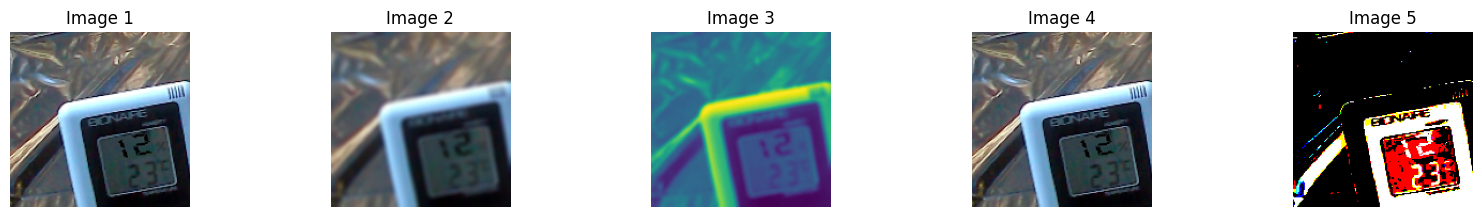

In [37]:
def generate_humidity_training(target_int):
    
    path = "training/HumiditySensor/backgrounds"
    backgrounds = os.listdir(path)
    background = backgrounds[randint(0, len(backgrounds)-1)]
    source_image = Image.open(f"{path}/{background}/img.png")
    with open(f"{path}/{background}/pose.json", "r") as fh:
        pose = json.load(fh)
    
    x, y = pose["x"], pose["y"]
    target_rotation = pose["rotate"]

    digits = create_digits_image(target_int, 40, 25, target_rotation, bionare_sensor_background)
    digits = digits.rotate(target_rotation)
    source_image.paste(digits, (x, y), digits)

    # source_image.save(f"training/HumiditySensor/outputs/{target_int}.png")

    img = np.array(source_image)
    blurred = cv2.GaussianBlur(img, (7, 7), 2)
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

    rtn, threshed = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

    display = [img, blurred, gray, source_image, threshed]

    rows = 2
    columns = len(display)
    fig = plt.figure(figsize=(20,5))
    for i in range(len(display)):
        frame = display[i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(frame)
        plt.axis("off")
        plt.title(f"Image {i+1}")

    plt.show()
generate_humidity_training(12)

In [6]:
def generate_ambient_temp_training(target_int):
    pass

In [7]:
def generate_weight_training(target_int):
    pass